In [15]:
import sys
sys.path.append('/home/grg/git/alfa')
from roistats import collect
from nilearn import datasets, plotting
from glob import glob
import os.path as op
import json
%matplotlib inline

# Collecting values from reference regions over a set of images

and saving them in an Excel table

In [17]:
t = 'L1'
atlas_name = 'labels-2mm'
data_wd = '/home/grg/data/AmylStaging/dartel_final/%s/'%t

# Paths to images, atlas, subjects, etc.
atlas_fp = datasets.fetch_atlas_jhu(atlas_name, '/usr/share')
maps_fp = glob(op.join(data_wd, 'rwr*_%s_t1space.nii'%t))
subjects = [e.split('/')[-1][3:8] for e in maps_fp]
labels = dict([(i+1,j) for i,j in zip(xrange(48), atlas_fp['labels'][2:])])
#labels = dict([(i+1,j) for i,j in zip(xrange(20), atlas_fp['labels'][1:])])
print labels

# Collecting ROI values
df = collect.roistats_from_maps(maps_fp, atlas_fp['maps'], subjects=subjects, labels=labels)

# Saving to Excel/Json files
d = {'images': maps_fp, 'atlas':atlas_fp}
fp = '/home/grg/amylstaging_ICBM-%s_DARTEL_roivalues_%s.json'%(atlas_name, t)
json.dump(d, open(fp,'w'))
df.to_excel(fp.replace('.json', '.xls'))

/usr/share/fsl
data/atlases/JHU/JHU-ICBM-labels-2mm.nii.gz
{1: 'Middle cerebellar peduncle', 2: 'Pontine crossing tract (a part of MCP)', 3: 'Genu of corpus callosum', 4: 'Body of corpus callosum', 5: 'Splenium of corpus callosum', 6: 'Fornix (column and body of fornix)', 7: 'Corticospinal tract R', 8: 'Corticospinal tract L', 9: 'Medial lemniscus R', 10: 'Medial lemniscus L', 11: 'Inferior cerebellar peduncle R  ', 12: 'Inferior cerebellar peduncle L', 13: 'Superior cerebellar peduncle R', 14: 'Superior cerebellar peduncle L', 15: 'Cerebral peduncle R', 16: 'Cerebral peduncle L', 17: 'Anterior limb of internal capsule R', 18: 'Anterior limb of internal capsule L', 19: 'Posterior limb of internal capsule R', 20: 'Posterior limb of internal capsule L', 21: 'Retrolenticular part of internal capsule R', 22: 'Retrolenticular part of internal capsule L', 23: 'Anterior corona radiata R', 24: 'Anterior corona radiata L', 25: 'Superior corona radiata R', 26: 'Superior corona radiata L', 27: 'P

[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    1.5s
[Parallel(n_jobs=7)]: Done 114 out of 114 | elapsed:    4.3s finished


## Checking the atlas matching over a random image

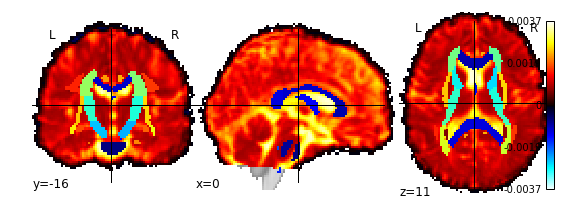

In [18]:
m = maps_fp[0]
a = atlas_fp['maps']
p = plotting.plot_stat_map(m)
p.add_overlay(a)